#Scenario: Business Owner's Request for Analysis
## Business Context:

House & Homely Ltd., a mid-sized retail company specializing in home goods and furnishings, has been experiencing fluctuations in sales and customer engagement. The company's marketing team has been running broad campaigns, but they've noticed that not all customers respond equally to their efforts. To improve marketing effectiveness and enhance customer retention, the business owner, Sarah Thompson, has reached out to you, their trusted business analyst, for a more data-driven approach.


## IMPORTS

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



##LOAD THE DATA

In [3]:
customer_data = pd.read_csv('/content/drive/MyDrive/Customer Segmentation Analysis/Customer_Segmentation_Data.csv')
customer_data.head()


,CustomerID,Age,Gender,Location,PurchaseFrequency,AvgOrderValue,DaysSinceLastPurchase,ProductVariety
0,1,56,Female,Rural,9,75.019089,260,8
1,2,69,Male,Urban,4,54.524576,109,9
2,3,46,Male,Urban,6,70.048329,330,4
3,4,32,Female,Urban,7,71.694523,189,1
4,5,60,Male,Suburban,4,27.608885,95,1


In [4]:
# Checking for missing values in the dataset
missing_values = customer_data.isnull().sum()
missing_values


,0
CustomerID,0
Age,0
Gender,0
Location,0
PurchaseFrequency,0
AvgOrderValue,0
DaysSinceLastPurchase,0
ProductVariety,0


### Handling Outliers

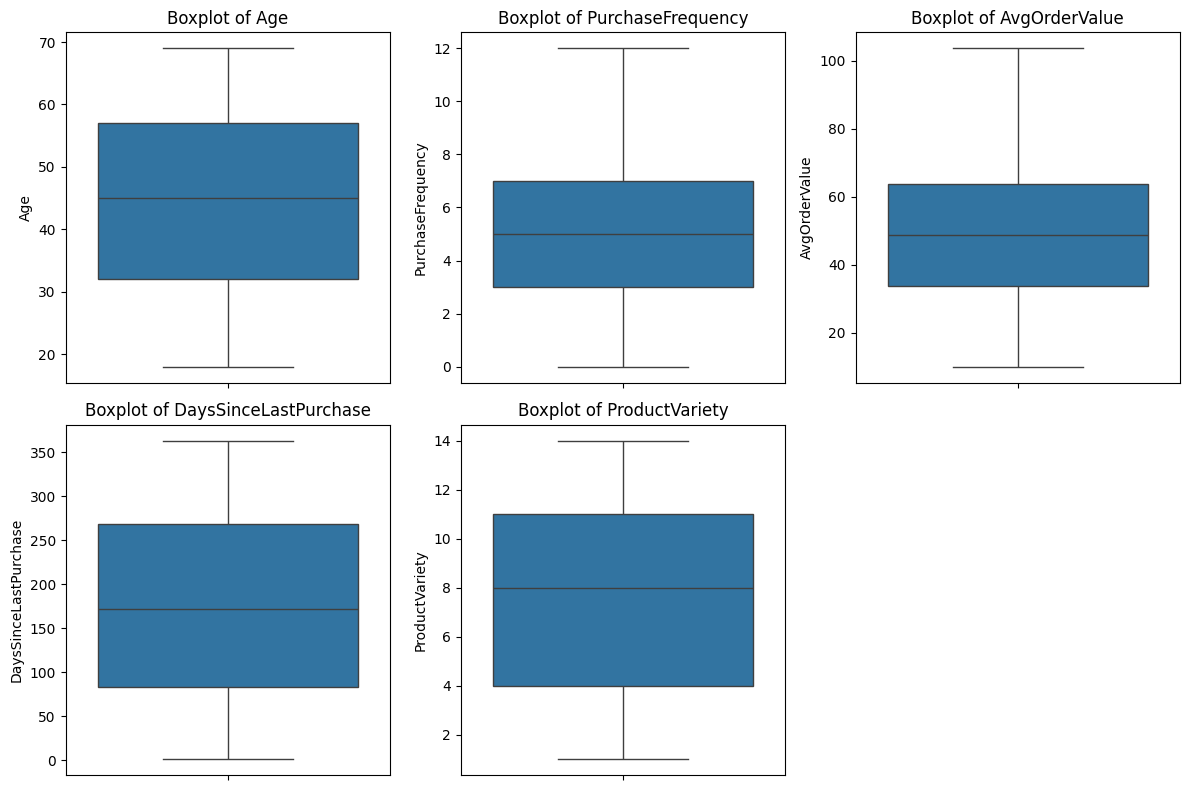

In [5]:
# Visualizing numerical data to identify outliers
numerical_columns = ['Age', 'PurchaseFrequency', 'AvgOrderValue', 'DaysSinceLastPurchase', 'ProductVariety']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=customer_data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


### Normalization/Standardization


In [7]:
# Selecting numerical columns for scaling
features = ['Age', 'PurchaseFrequency', 'AvgOrderValue', 'DaysSinceLastPurchase', 'ProductVariety']

# Initializing the scaler
scaler = StandardScaler()

# Scaling the features
scaled_features = scaler.fit_transform(customer_data[features])

# Creating a DataFrame with scaled features
scaled_customer_data = pd.DataFrame(scaled_features, columns=features)
scaled_customer_data.head()


,Age,PurchaseFrequency,AvgOrderValue,DaysSinceLastPurchase,ProductVariety
0,0.784233,1.763471,1.322917,0.840374,0.091592
1,1.649686,-0.454173,0.278636,-0.615094,0.341842
2,0.118500,0.432884,1.069636,1.515094,-0.909409
3,-0.813526,0.876413,1.153516,0.156015,-1.660159
4,1.050527,-0.454173,-1.092830,-0.750039,-1.660159


### Exploratory Data Analysis (EDA)

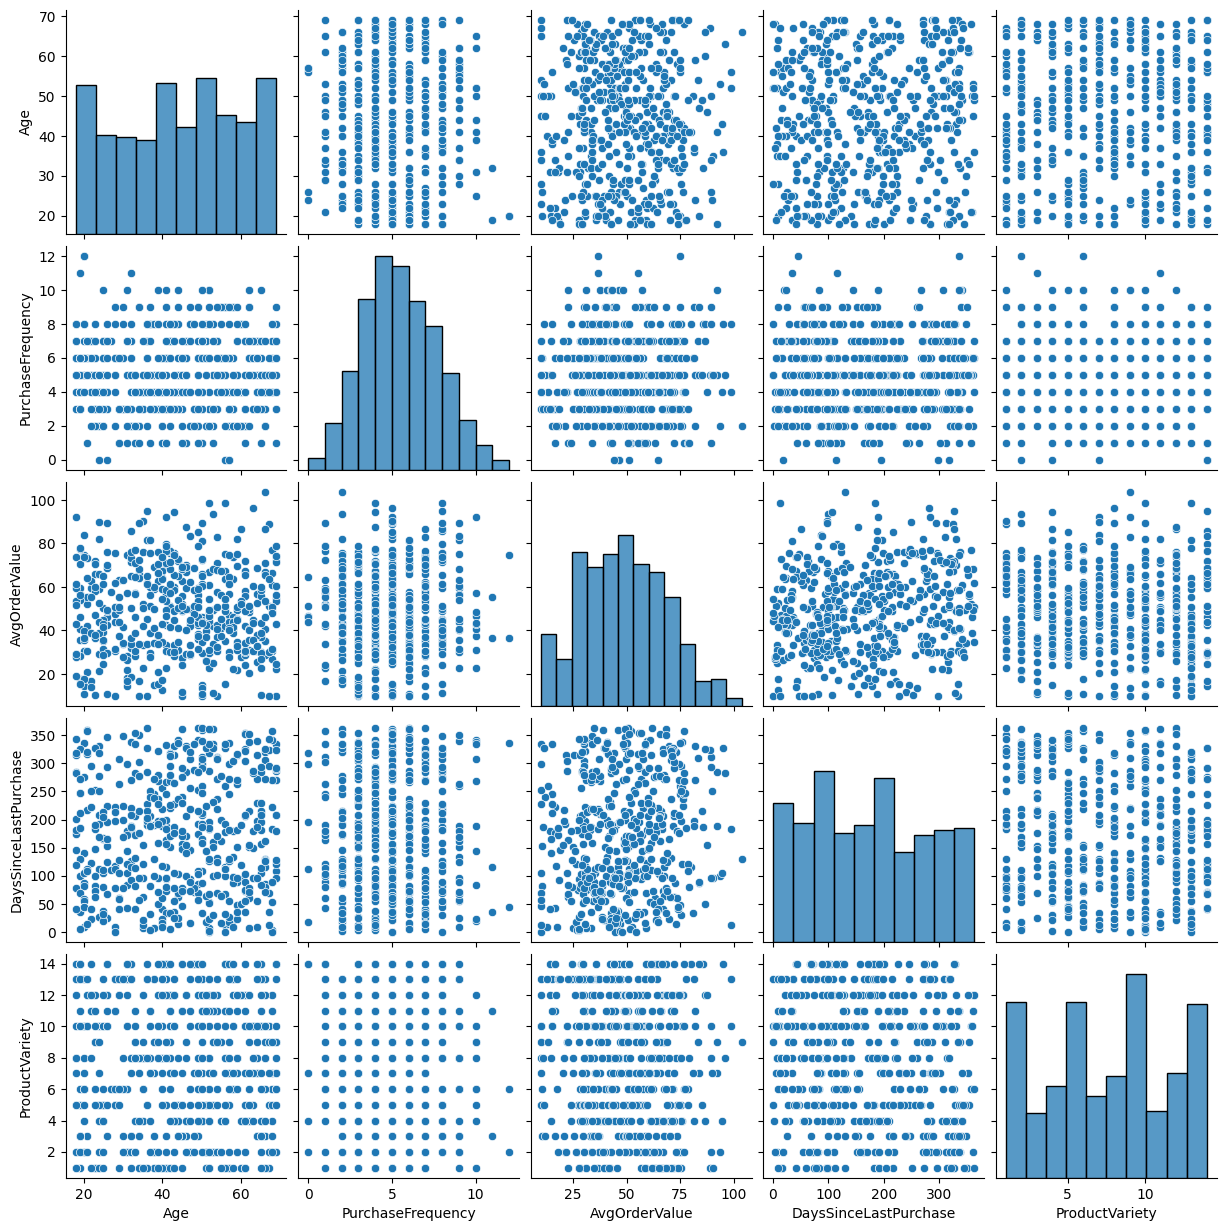

In [9]:
# Pairplot to visualize relationships between variables
sns.pairplot(customer_data[numerical_columns])
plt.show()

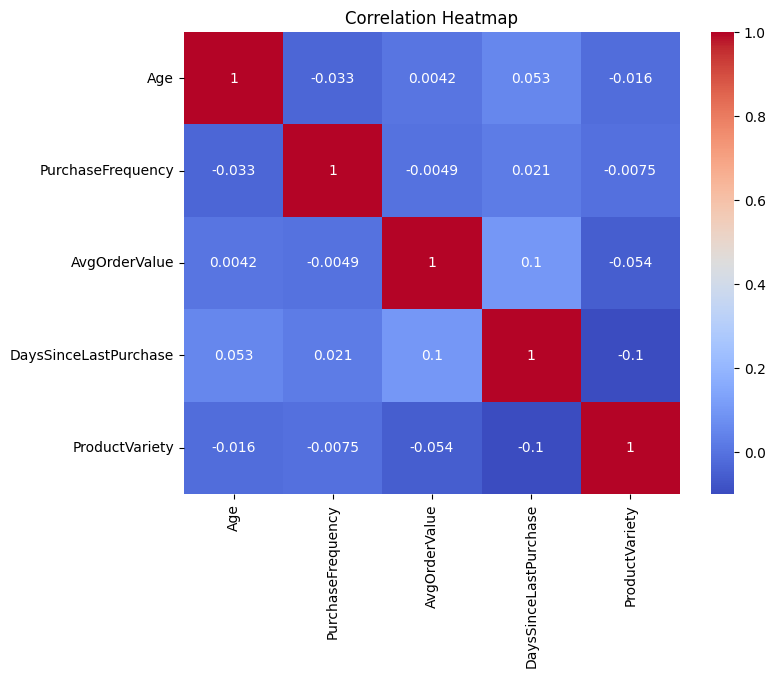

In [10]:
# Correlation heatmap to check relationships
plt.figure(figsize=(8, 6))
sns.heatmap(customer_data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


###  Clustering and Segmentation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

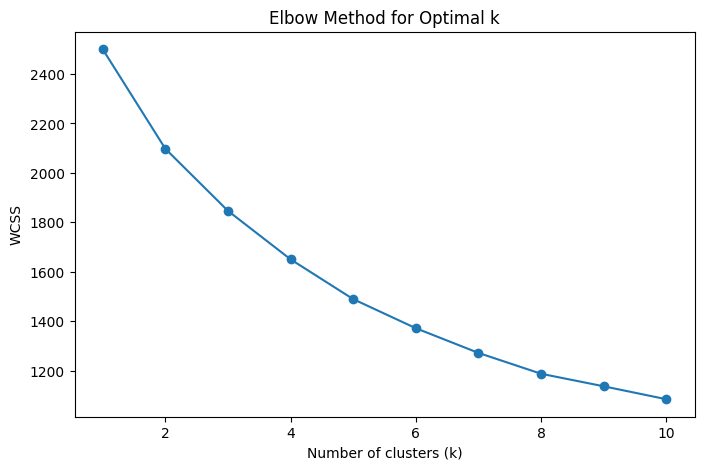

In [13]:
# Calculating WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_customer_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [14]:
# Applying K-Means with the chosen number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_customer_data)

# Displaying the first few rows with cluster labels
customer_data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Age,Gender,Location,PurchaseFrequency,AvgOrderValue,DaysSinceLastPurchase,ProductVariety,Cluster
0,1,56,Female,Rural,9,75.019089,260,8,2
1,2,69,Male,Urban,4,54.524576,109,9,0
2,3,46,Male,Urban,6,70.048329,330,4,3
3,4,32,Female,Urban,7,71.694523,189,1,3
4,5,60,Male,Suburban,4,27.608885,95,1,2


<ipython-input-17-86faed01864a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=customer_data, palette='viridis')


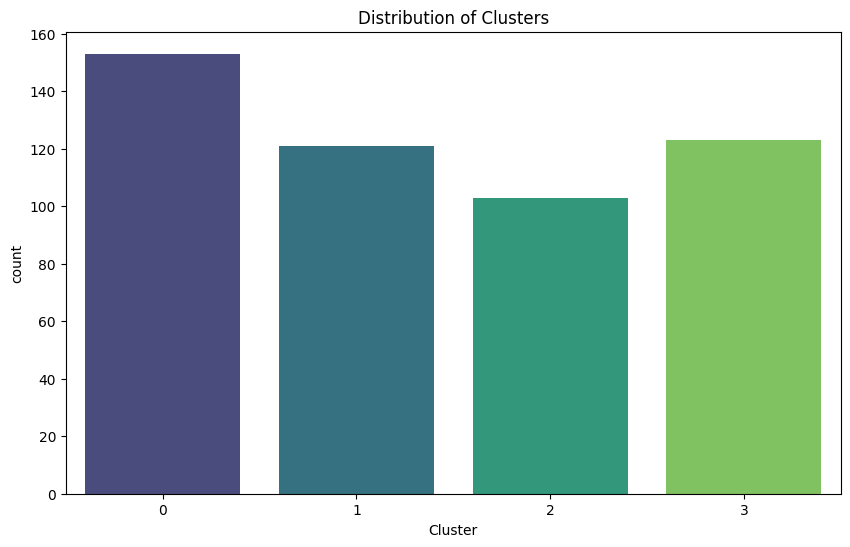

In [17]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=customer_data, palette='viridis')
plt.title('Distribution of Clusters')
plt.show()

<ipython-input-18-6df261d6fe59>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=customer_data, palette='viridis')
<ipython-input-18-6df261d6fe59>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=customer_data, palette='viridis')
<ipython-input-18-6df261d6fe59>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=customer_data, palette='viridis')
<ipython-input-18-6df261d6fe59>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

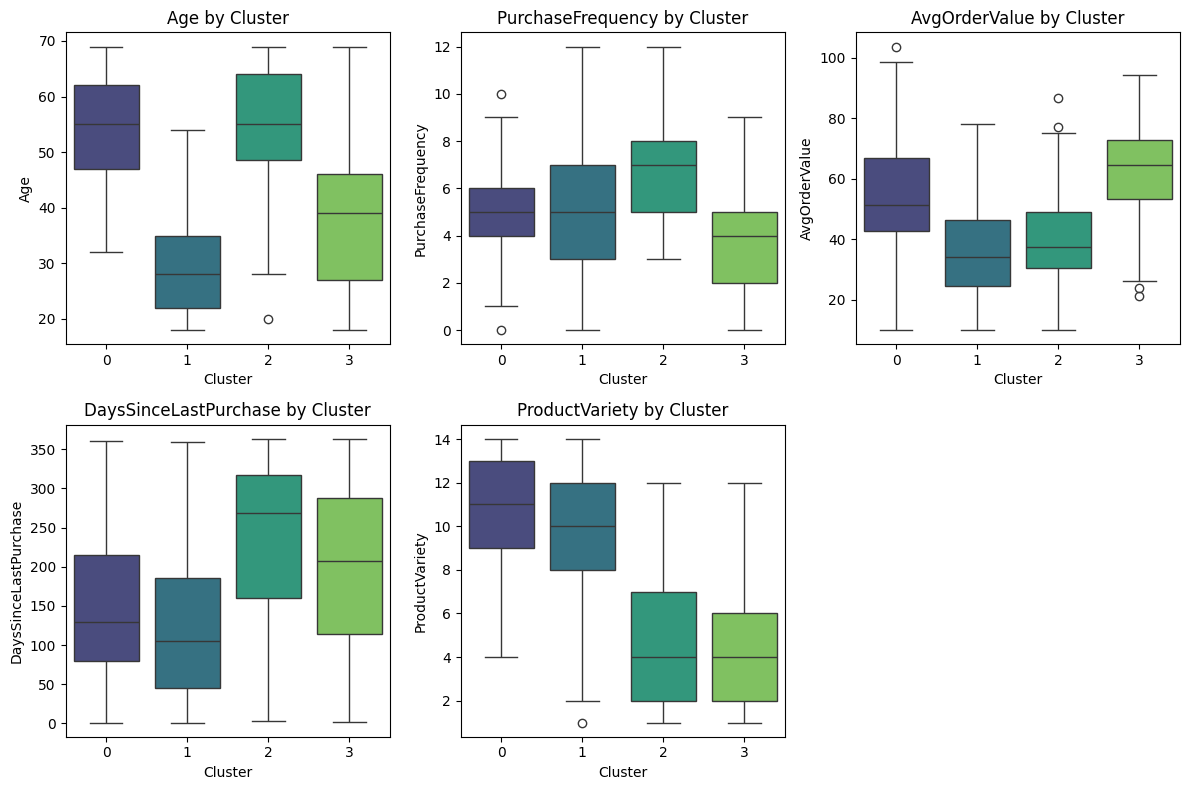

In [18]:
# Boxplot of each feature by cluster
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster', y=column, data=customer_data, palette='viridis')
    plt.title(f'{column} by Cluster')

plt.tight_layout()
plt.show()


### VISUALISATIONS

<ipython-input-21-cb96e9e629ac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=customer_data, palette=['#0f9d58', '#0a0a0a'])
<ipython-input-21-cb96e9e629ac>:3: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Cluster', data=customer_data, palette=['#0f9d58', '#0a0a0a'])


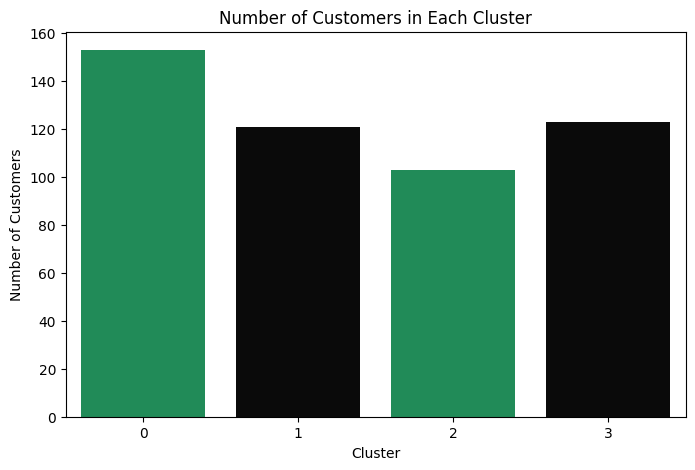

In [21]:
# Bar chart for cluster distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=customer_data, palette=['#0f9d58', '#0a0a0a'])
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


In [23]:
# List of numeric features only
numeric_features = ['Age', 'PurchaseFrequency', 'AvgOrderValue', 'DaysSinceLastPurchase', 'ProductVariety']

# Calculate mean only on numeric columns to avoid errors
cluster_summary = customer_data.groupby('Cluster')[numeric_features].mean()
cluster_summary


,Age,PurchaseFrequency,AvgOrderValue,DaysSinceLastPurchase,ProductVariety
Cluster,,,,,
0,54.202614,4.810458,54.530418,150.568627,10.745098
1,29.049587,5.190083,36.015430,118.950413,9.553719
2,54.281553,6.728155,40.046537,232.456311,4.660194
3,38.300813,3.699187,62.620226,203.528455,4.365854


<ipython-input-26-d2e3090fa480>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=customer_data, ax=axs[i//3, i%3], palette=['#0f9d58', '#ffffff', '#0a0a0a'])
<ipython-input-26-d2e3090fa480>:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Cluster', y=column, data=customer_data, ax=axs[i//3, i%3], palette=['#0f9d58', '#ffffff', '#0a0a0a'])
<ipython-input-26-d2e3090fa480>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=customer_data, ax=axs[i//3, i%3], palette=['#0f9d58', '#ffffff', '#0a0a0a'])
<ipython-input-26-d2e3090fa480>:4: UserWarnin

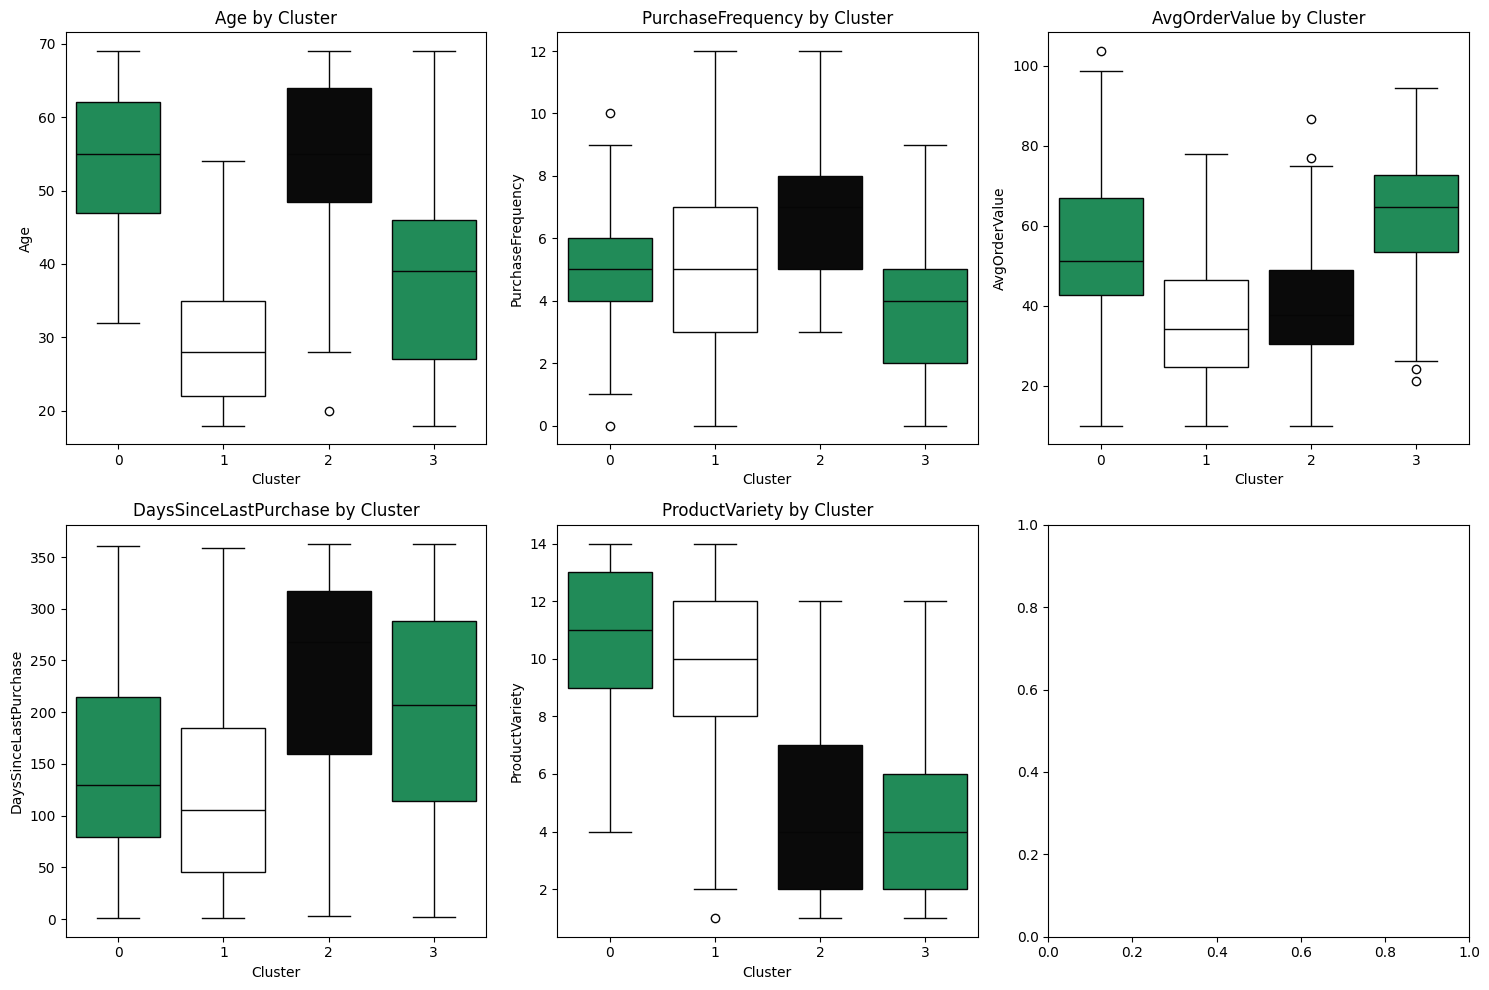

In [26]:
# Boxplots by cluster
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, column in enumerate(features):
    sns.boxplot(x='Cluster', y=column, data=customer_data, ax=axs[i//3, i%3], palette=['#0f9d58', '#ffffff', '#0a0a0a'])
    axs[i//3, i%3].set_title(f'{column} by Cluster')
plt.tight_layout()
plt.show()


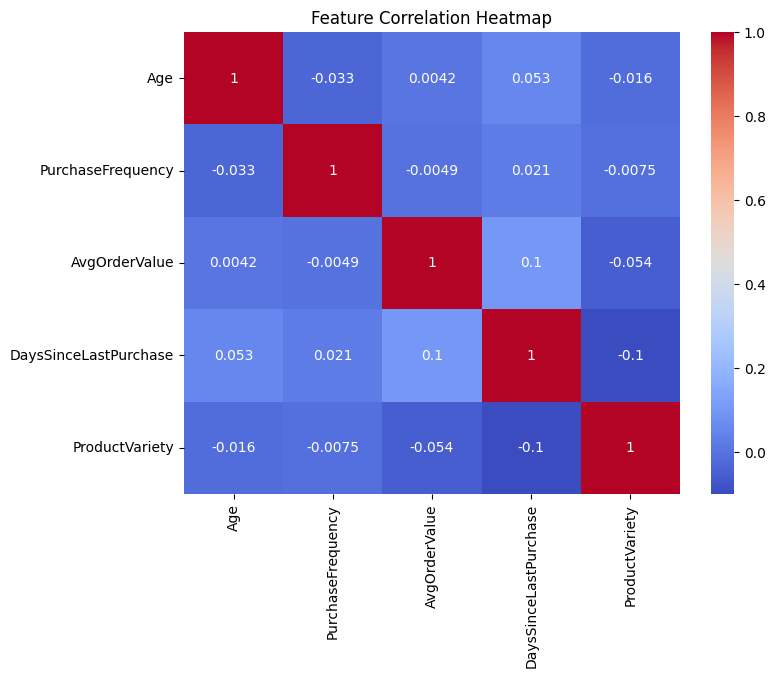

In [27]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(customer_data[features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


<ipython-input-28-6ae044a4bbbc>:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='PurchaseFrequency', y='AvgOrderValue', hue='Cluster', data=customer_data, palette=['#0f9d58', '#ffffff', '#0a0a0a'])


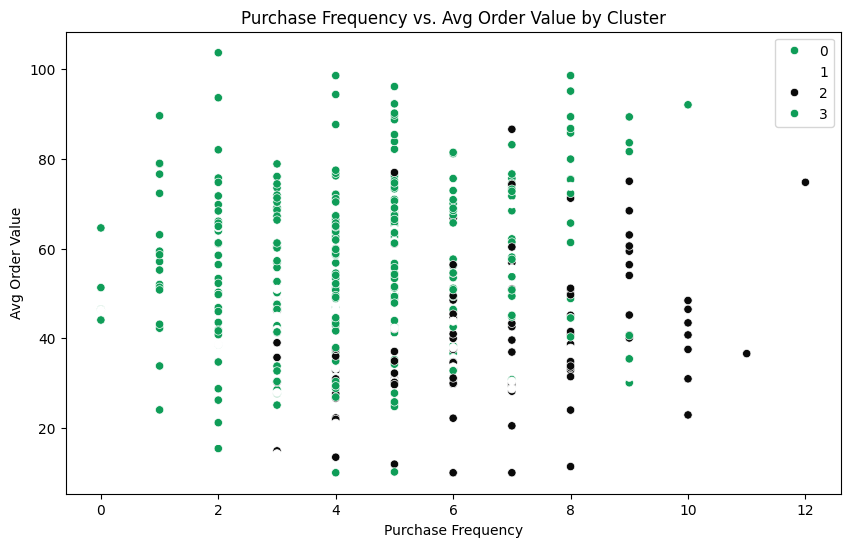

In [28]:
# Scatter plot of feature pairs by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PurchaseFrequency', y='AvgOrderValue', hue='Cluster', data=customer_data, palette=['#0f9d58', '#ffffff', '#0a0a0a'])
plt.title('Purchase Frequency vs. Avg Order Value by Cluster')
plt.xlabel('Purchase Frequency')
plt.ylabel('Avg Order Value')
plt.legend(loc='upper right')
plt.show()


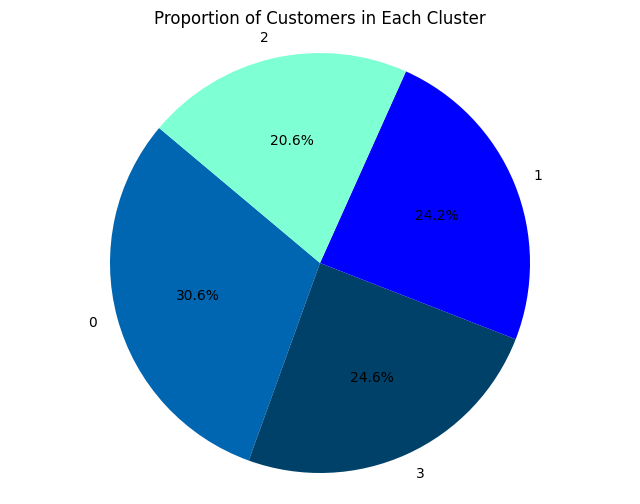

In [34]:
# Pie chart of customer segmentation breakdown
cluster_counts = customer_data['Cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=['#0066b2','#00416A', '#0000FF', '#7FFFD4'], startangle=140)
plt.axis('equal')
plt.title('Proportion of Customers in Each Cluster')
plt.show()


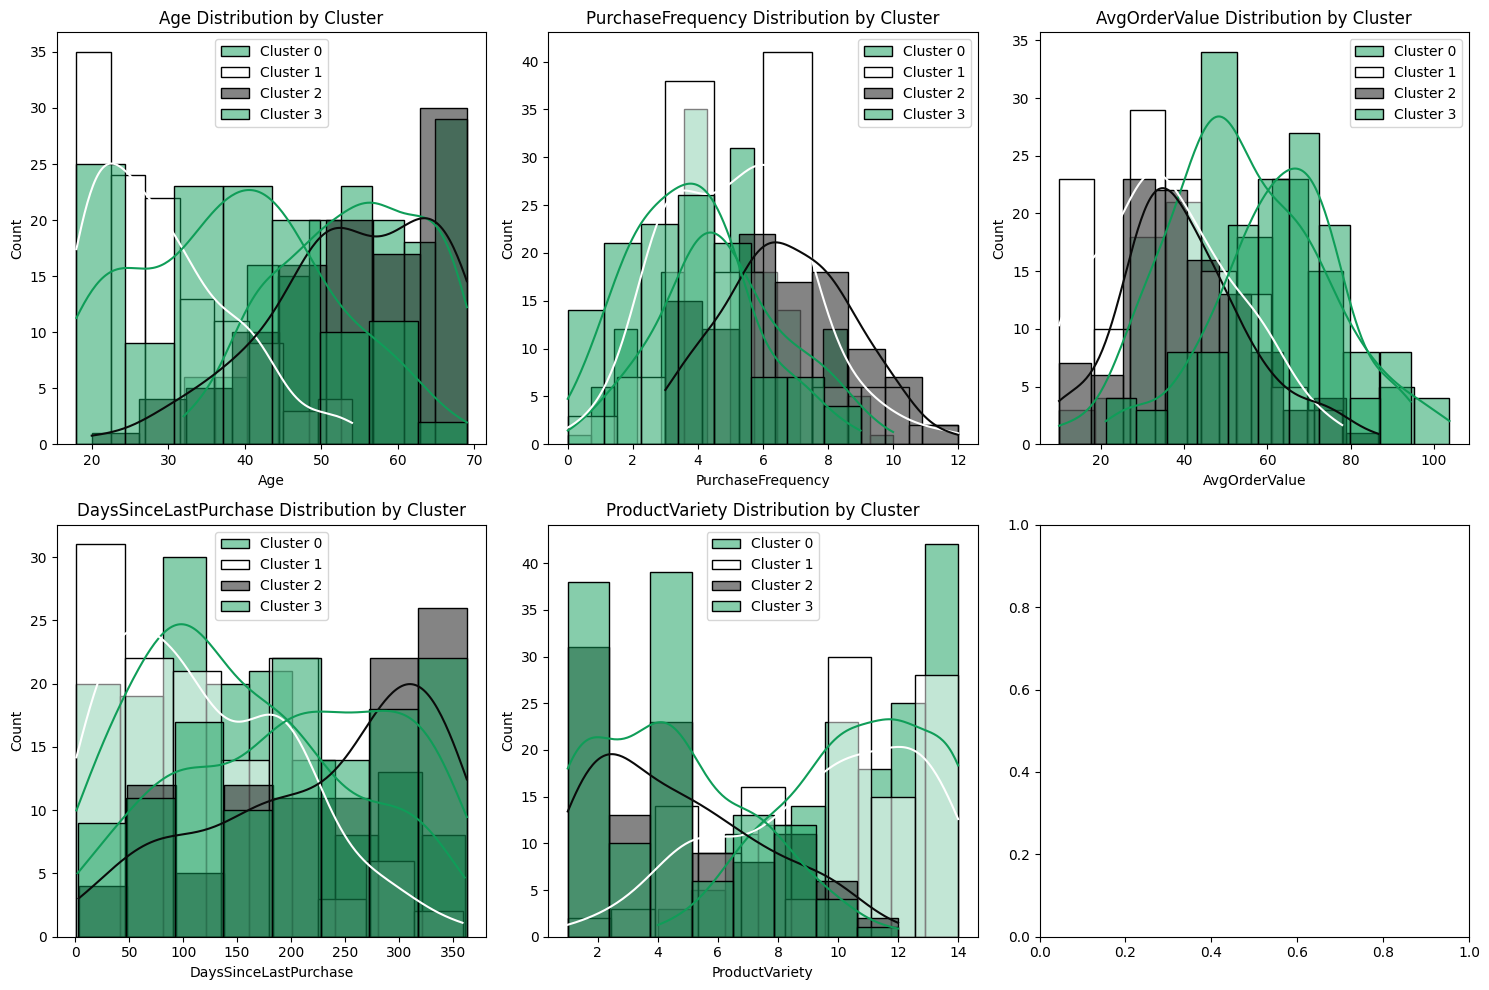

In [36]:
# Distribution histograms of features within clusters
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, column in enumerate(features):
    for cluster in range(optimal_k):
        sns.histplot(customer_data[customer_data['Cluster'] == cluster][column], kde=True, ax=axs[i//3, i%3], label=f'Cluster {cluster}', color=['#0f9d58', '#ffffff', '#0a0a0a'][cluster % 3])
    axs[i//3, i%3].set_title(f'{column} Distribution by Cluster')
    axs[i//3, i%3].legend()
plt.tight_layout()
plt.show()



In [37]:
# Sankey diagram or other flow diagram (requires additional library like plotly)
import plotly.graph_objects as go

# Example data setup
source = [0, 0, 1, 1, 2, 2]
target = [1, 2, 2, 3, 3, 0]
values = [10, 5, 15, 5, 5, 5]

fig = go.Figure(go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5),
              label=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]),
    link=dict(source=source, target=target, value=values)))

fig.update_layout(title_text="Customer Journey Map", font_size=10)
fig.show()
